In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.densenet import DenseNet201

In [2]:
# Read input images and assign labels based on folder names
print(os.listdir("../input/coviddataset/Data/"))

SIZE = 128  #Resize images

['test', 'train']


In [3]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("../input/coviddataset/Data/train/*"):
    print(repr(directory_path))
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
#         img = cv2.resize(img, (SIZE, SIZE))
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = img_to_array(load_img(img_path, target_size = (SIZE,SIZE)))  
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)
print(train_labels)

'../input/coviddataset/Data/train/PNEUMONIA'
PNEUMONIA
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3189).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3607).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2169).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(969).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(704).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1952).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2307).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2890).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2601).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3961).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1266).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1961).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3958).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2693).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1237).jpg
..

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(427).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(950).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1798).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(887).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(733).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3033).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1414).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(311).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3462).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(114).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2200).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(259).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(585).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2699).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2597).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1643).jpg


../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(191).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(708).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2596).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(152).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3885).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3815).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2567).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1376).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2094).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(586).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2313).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3185).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3214).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1907).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1523).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1426).

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(461).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3676).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1133).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3226).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2893).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1363).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(304).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(750).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(952).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1654).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1598).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1781).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3772).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3669).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(609).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1626).j

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1799).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2870).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1254).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1524).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1061).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1784).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3828).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2709).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3097).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3648).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1829).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3995).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1060).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2909).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3040).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(38

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(650).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(588).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1055).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1757).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3029).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3660).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3637).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1393).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1472).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3663).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2405).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(123).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(502).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1111).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2300).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3620).

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3035).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1900).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(391).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(814).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1606).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2948).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3421).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3094).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(374).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1800).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(540).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2935).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1276).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3218).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3293).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3).jpg

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(688).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3195).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1509).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3612).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(592).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1257).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3136).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2580).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1507).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(65).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2111).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1976).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3041).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1555).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(795).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3550).j

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(819).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3625).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1484).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3854).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2479).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3605).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3167).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(260).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1949).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(224).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3101).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1110).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2915).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1615).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2321).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1337)

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2237).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1901).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3821).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1662).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3219).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1185).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3084).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2342).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3843).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(751).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(782).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3489).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2917).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(289).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2792).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2434)

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1725).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3188).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(76).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1081).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1778).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2295).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1453).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1832).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2810).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1187).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2305).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2886).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2636).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2025).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(925).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(938).

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3030).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1875).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1963).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(117).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(405).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3638).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(43).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1015).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(443).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(973).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2168).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1593).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1736).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1207).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(132).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1089).jpg

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1542).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2644).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(137).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1096).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(184).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3211).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2504).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(127).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1141).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3508).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3759).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1294).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2737).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2287).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2079).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3141)

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2531).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3090).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2432).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2591).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2786).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2224).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1417).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1892).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2651).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3006).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2969).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(343).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3082).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3416).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3915).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(212

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3798).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1668).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3258).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1780).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3100).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1698).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3664).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2696).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1029).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(283).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3447).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1372).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(133).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2813).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1084).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3610

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3629).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3835).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2268).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1573).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2922).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3964).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3326).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1570).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(899).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3916).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(411).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1012).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3426).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2450).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(875).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(714).

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2939).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1749).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2562).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(662).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(430).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3670).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1469).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2902).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(38).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3844).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1287).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2404).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(833).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(321).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2253).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1327).jp

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1868).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1142).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3419).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3433).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(378).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(510).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1281).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3765).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3969).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2783).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(431).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3137).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2624).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2952).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(398).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2876).

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1165).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1847).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1423).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(658).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2754).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1915).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2472).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3004).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1356).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2970).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(612).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1007).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2008).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1611).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2238).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2957

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2161).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1129).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2748).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3847).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2766).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(171).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3546).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1516).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1577).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1962).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2811).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3880).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(881).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2856).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2895).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3920

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3888).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3177).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(918).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3436).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(393).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3161).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2223).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(634).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1000).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(934).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3977).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2172).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1059).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(780).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2458).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2480).j

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1554).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2145).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1485).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1045).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3722).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1818).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2998).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3510).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2241).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1535).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3544).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2091).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3174).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3267).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(919).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(173

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2736).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2616).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1741).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1683).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3370).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3400).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3646).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2469).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3157).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2420).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(480).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(810).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1432).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(624).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3027).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2398)

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3287).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(501).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2170).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2951).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3573).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3079).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3455).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3924).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2476).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1928).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(840).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2160).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2026).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1545).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2226).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1217

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(766).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2674).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(364).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(684).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(769).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(738).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1291).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2665).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2679).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2060).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(747).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2911).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(125).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2621).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(164).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(977).jpg
.

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1216).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(979).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(993).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(978).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3391).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1515).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2707).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2383).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3926).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(990).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2116).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(39).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(771).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2440).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1403).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3220).jpg

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(113).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2510).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1200).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3501).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3891).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3198).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1994).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3754).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1663).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(413).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1375).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(834).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(279).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2545).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(148).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2805).j

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1619).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1223).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1714).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3876).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2592).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(988).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2040).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1300).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2320).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(832).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(109).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1359).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(809).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3242).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(46).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2842).jp

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3065).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1813).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3121).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3151).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3604).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3307).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2099).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2871).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1831).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3204).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3461).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(390).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(375).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(928).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3490).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(555).

../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2356).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(781).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2213).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1679).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2864).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(95).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2539).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(892).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3845).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(490).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2483).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1879).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3662).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(399).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3248).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1284).jp

../input/coviddataset/Data/train/NORMAL/NORMAL(1539).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(643).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3642).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1705).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3599).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2881).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(500).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(88).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3459).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3601).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3420).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1520).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1863).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1792).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2603).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3288).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3911).jpg
../input/coviddataset/Data/train/NO

../input/coviddataset/Data/train/NORMAL/NORMAL(714).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1795).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3385).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(989).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2482).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1122).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1525).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3085).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1724).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2432).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(817).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2377).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3177).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2309).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2764).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1016).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2621).jpg
../input/coviddataset/Data/train/N

../input/coviddataset/Data/train/NORMAL/NORMAL(3172).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3435).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(319).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1198).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1295).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2095).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1767).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3643).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3509).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1510).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1262).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2061).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2921).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3962).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2910).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3594).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1169).jpg
../input/coviddataset/Data/train

../input/coviddataset/Data/train/NORMAL/NORMAL(1267).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2466).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(80).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(264).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3027).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(920).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1327).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1561).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3793).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(911).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1858).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1163).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2033).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2892).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2451).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3804).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1982).jpg
../input/coviddataset/Data/train/NOR

../input/coviddataset/Data/train/NORMAL/NORMAL(1740).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(192).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(69).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1557).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2939).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(651).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2774).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3111).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2952).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(835).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2845).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(539).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(309).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2772).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1633).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2412).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1806).jpg
../input/coviddataset/Data/train/NORMA

../input/coviddataset/Data/train/NORMAL/NORMAL(356).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(503).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3443).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1005).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3314).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2090).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(358).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1528).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(831).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(606).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3734).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3605).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1923).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2564).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2424).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3133).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3748).jpg
../input/coviddataset/Data/train/NOR

../input/coviddataset/Data/train/NORMAL/NORMAL(2816).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2711).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3972).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1508).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2635).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(871).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1739).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1450).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1094).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1829).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(889).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3203).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1837).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(257).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1027).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3590).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2379).jpg
../input/coviddataset/Data/train/N

../input/coviddataset/Data/train/NORMAL/NORMAL(3128).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3862).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3562).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2074).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3187).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2620).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(813).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(173).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1212).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1170).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3430).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3189).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2888).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(557).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3943).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(259).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1574).jpg
../input/coviddataset/Data/train/NO

../input/coviddataset/Data/train/NORMAL/NORMAL(2568).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2775).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2982).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3339).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1652).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1513).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2091).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1492).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(133).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1131).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(924).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3131).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1208).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2279).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1800).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(553).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3596).jpg
../input/coviddataset/Data/train/N

../input/coviddataset/Data/train/NORMAL/NORMAL(738).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1913).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3268).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1304).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1827).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2660).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(222).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(87).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3021).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1930).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(421).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1153).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(586).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3803).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3278).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2517).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(217).jpg
../input/coviddataset/Data/train/NORMA

../input/coviddataset/Data/train/NORMAL/NORMAL(2444).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2681).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1445).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(764).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1553).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2608).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2037).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2828).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3541).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3760).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2846).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2913).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(769).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2409).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2616).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2046).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3125).jpg
../input/coviddataset/Data/train/

../input/coviddataset/Data/train/NORMAL/NORMAL(3940).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(183).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1635).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(921).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1221).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(383).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(476).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3484).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(244).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(357).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1152).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3355).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1695).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3727).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2139).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2386).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(243).jpg
../input/coviddataset/Data/train/NORMA

../input/coviddataset/Data/train/NORMAL/NORMAL(719).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1531).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2722).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(886).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2999).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2357).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2777).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(340).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(22).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(60).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(130).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2338).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(844).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2960).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(368).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1807).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3850).jpg
../input/coviddataset/Data/train/NORMAL/N

../input/coviddataset/Data/train/NORMAL/NORMAL(1324).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(326).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(149).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2350).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1217).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(900).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(61).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(723).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2524).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3412).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(866).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2006).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1260).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2511).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3315).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(847).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2751).jpg
../input/coviddataset/Data/train/NORMAL

../input/coviddataset/Data/train/NORMAL/NORMAL(2858).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1822).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3514).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1216).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(590).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2557).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1920).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(71).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2651).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3150).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(211).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3724).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(379).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2135).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3520).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2298).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3299).jpg
../input/coviddataset/Data/train/NOR

../input/coviddataset/Data/train/NORMAL/NORMAL(3673).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1279).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(832).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(787).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2419).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3507).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(683).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(409).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3204).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2251).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3004).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(35).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(996).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2917).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2759).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(203).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(172).jpg
../input/coviddataset/Data/train/NORMAL/

../input/coviddataset/Data/train/NORMAL/NORMAL(3438).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1401).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2123).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1532).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1925).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1205).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2778).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3330).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3232).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3565).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1708).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2252).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3064).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(498).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1645).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3559).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2393).jpg
../input/coviddataset/Data/train

../input/coviddataset/Data/train/NORMAL/NORMAL(2931).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(961).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3965).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1030).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(465).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(580).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3270).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2429).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2282).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1548).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1931).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(213).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2618).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1387).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3252).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1526).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(14).jpg
../input/coviddataset/Data/train/NORM

../input/coviddataset/Data/train/NORMAL/NORMAL(2243).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2404).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3344).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1615).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1778).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1186).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1997).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3741).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(796).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3287).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3277).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2916).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3151).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(841).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1675).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3360).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3259).jpg
../input/coviddataset/Data/train/

../input/coviddataset/Data/train/NORMAL/NORMAL(549).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2262).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1860).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3072).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3392).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(852).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3320).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(446).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1727).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(401).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1921).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2351).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(320).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1154).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(762).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3213).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3690).jpg
../input/coviddataset/Data/train/NORM

../input/coviddataset/Data/train/NORMAL/NORMAL(2740).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1333).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3468).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(638).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(519).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(980).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2396).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(834).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3820).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1511).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(562).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3544).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3686).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3145).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2042).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3954).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3364).jpg
../input/coviddataset/Data/train/NOR

../input/coviddataset/Data/train/NORMAL/NORMAL(1293).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1900).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(49).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3934).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3432).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(708).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2352).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2726).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1019).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(828).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(327).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3073).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2161).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3916).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(619).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2780).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(612).jpg
../input/coviddataset/Data/train/NORMA

../input/coviddataset/Data/train/NORMAL/NORMAL(1851).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(236).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2686).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(452).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1118).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(691).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3844).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1346).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2157).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1164).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1231).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1282).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(853).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2304).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3091).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3685).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2439).jpg
../input/coviddataset/Data/train/NO

../input/coviddataset/Data/train/NORMAL/NORMAL(872).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1754).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3456).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(29).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2494).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(793).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2810).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1729).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2079).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3180).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2487).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2880).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2257).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(509).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3703).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(593).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1918).jpg
../input/coviddataset/Data/train/NORM

../input/coviddataset/Data/train/NORMAL/NORMAL(3645).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2636).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2663).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(152).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1382).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(661).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1741).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1791).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3546).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2957).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1588).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(631).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1703).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(285).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3068).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(201).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1141).jpg
../input/coviddataset/Data/train/NOR

../input/coviddataset/Data/train/NORMAL/NORMAL(1400).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(956).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1008).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(189).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2662).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1022).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2928).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(53).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(36).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2967).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2790).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2600).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1415).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(2865).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(3230).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1080).jpg
../input/coviddataset/Data/train/NORMAL/NORMAL(1592).jpg
../input/coviddataset/Data/train/NORM

../input/coviddataset/Data/train/COVID19/COVID19(3745).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1965).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3152).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0943).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1138).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1095).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3626).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1785).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3313).jpg
../input/coviddataset/Data/train/COVID19/COVID19(303).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2821).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2725).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0985).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2728).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3341).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2291).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2266).jp

../input/coviddataset/Data/train/COVID19/COVID19(1030).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3303).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2130).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3467).jpg
../input/coviddataset/Data/train/COVID19/COVID19(216).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1100).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3627).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1049).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3360).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3422).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3557).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3695).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0476).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0953).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2942).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3420).jpg
../input/coviddataset/Data/train/COVID19/COVID19(409).jpg

../input/coviddataset/Data/train/COVID19/COVID19(3288).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2720).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3489).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3403).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1300).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3084).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2738).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1851).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0510).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1513).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1562).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2739).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2828).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0897).jpg
../input/coviddataset/Data/train/COVID19/COVID19(74).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3891).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1132).jpg

../input/coviddataset/Data/train/COVID19/COVID19(0905).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0491).jpg
../input/coviddataset/Data/train/COVID19/COVID19(136).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2034).jpg
../input/coviddataset/Data/train/COVID19/COVID19(298).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3159).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1043).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2243).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0594).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3769).jpg
../input/coviddataset/Data/train/COVID19/COVID19(349).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1319).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1216).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1387).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3755).jpg
../input/coviddataset/Data/train/COVID19/COVID19(204).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0797).jpg
.

../input/coviddataset/Data/train/COVID19/COVID19(2646).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1960).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3092).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2346).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3841).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3011).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0984).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3799).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3028).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2604).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1051).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3454).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3180).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2507).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1135).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1037).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0756).j

../input/coviddataset/Data/train/COVID19/COVID19(2140).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3300).jpg
../input/coviddataset/Data/train/COVID19/COVID19(39).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2205).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0571).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3820).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2433).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3829).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0817).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1024).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1664).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1643).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0882).jpg
../input/coviddataset/Data/train/COVID19/COVID19(244).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1647).jpg
../input/coviddataset/Data/train/COVID19/COVID19(96).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2406).jpg
..

../input/coviddataset/Data/train/COVID19/COVID19(327).jpg
../input/coviddataset/Data/train/COVID19/COVID19(348).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0493).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0825).jpg
../input/coviddataset/Data/train/COVID19/COVID19(426).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2565).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2058).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3215).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2294).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0617).jpg
../input/coviddataset/Data/train/COVID19/COVID19(433).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3667).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3312).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2872).jpg
../input/coviddataset/Data/train/COVID19/COVID19(420).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0963).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2082).jpg
..

../input/coviddataset/Data/train/COVID19/COVID19(3938).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0520).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2525).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2913).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2926).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2675).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1840).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2975).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1437).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3339).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0576).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0708).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3415).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3438).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0790).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1054).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1760).j

../input/coviddataset/Data/train/COVID19/COVID19(3504).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1628).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1386).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3021).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0775).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0701).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3158).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1314).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1989).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0980).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3879).jpg
../input/coviddataset/Data/train/COVID19/COVID19(429).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1757).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3560).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3995).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2421).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2280).jp

../input/coviddataset/Data/train/COVID19/COVID19(0804).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0974).jpg
../input/coviddataset/Data/train/COVID19/COVID19(119).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3229).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3124).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1403).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0948).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1260).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0494).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3735).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2849).jpg
../input/coviddataset/Data/train/COVID19/COVID19(33).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3331).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3508).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1000).jpg
../input/coviddataset/Data/train/COVID19/COVID19(450).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1056).jpg
.

../input/coviddataset/Data/train/COVID19/COVID19(3228).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3391).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0834).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3535).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3801).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3460).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3712).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1291).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2688).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2262).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0640).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3194).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1792).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3108).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3475).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2519).jpg


../input/coviddataset/Data/train/COVID19/COVID19(3895).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1854).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0881).jpg
../input/coviddataset/Data/train/COVID19/COVID19(237).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2311).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3810).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0477).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1358).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3216).jpg
../input/coviddataset/Data/train/COVID19/COVID19(14).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1518).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2440).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1257).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3568).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3486).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2662).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2020).jpg


../input/coviddataset/Data/train/COVID19/COVID19(2217).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3903).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3715).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2472).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3464).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3838).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3581).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1721).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2557).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1741).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3465).jpg
../input/coviddataset/Data/train/COVID19/COVID19(333).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2444).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0658).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1258).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2745).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0779).jp

../input/coviddataset/Data/train/COVID19/COVID19(2076).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3572).jpg
../input/coviddataset/Data/train/COVID19/COVID19(103).jpg
../input/coviddataset/Data/train/COVID19/COVID19(457).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2654).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2801).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3705).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1615).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3477).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3374).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2399).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2004).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3073).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3249).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0655).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1326).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0818).jpg

../input/coviddataset/Data/train/COVID19/COVID19(1768).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2075).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0921).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1333).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3832).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3598).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1894).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0769).jpg
../input/coviddataset/Data/train/COVID19/COVID19(160).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2589).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3573).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1645).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0555).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3429).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0467).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1394).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2228).jp

../input/coviddataset/Data/train/COVID19/COVID19(1415).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2416).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3533).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1168).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3985).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1322).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3685).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1737).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0507).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3279).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0773).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2138).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3269).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3584).jpg
../input/coviddataset/Data/train/COVID19/COVID19(453).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1642).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2397).jp

../input/coviddataset/Data/train/COVID19/COVID19(3463).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3440).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3783).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3031).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3094).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1373).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2713).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1179).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1435).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0516).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3364).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3210).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2976).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2920).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0784).jpg
../input/coviddataset/Data/train/COVID19/COVID19(78).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3212).jpg

../input/coviddataset/Data/train/COVID19/COVID19(3889).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2285).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3518).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1416).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3784).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0648).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2594).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2415).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1253).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3528).jpg
../input/coviddataset/Data/train/COVID19/COVID19(104).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0853).jpg
../input/coviddataset/Data/train/COVID19/COVID19(48).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2286).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3600).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0747).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3991).jpg


../input/coviddataset/Data/train/COVID19/COVID19(3470).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3097).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2388).jpg
../input/coviddataset/Data/train/COVID19/COVID19(58).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1277).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2953).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0806).jpg
../input/coviddataset/Data/train/COVID19/COVID19(30).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2892).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3934).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3026).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1706).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2586).jpg
../input/coviddataset/Data/train/COVID19/COVID19(173).jpg
../input/coviddataset/Data/train/COVID19/COVID19(300).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0946).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2707).jpg
../

../input/coviddataset/Data/train/COVID19/COVID19(0624).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0770).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2061).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3896).jpg
../input/coviddataset/Data/train/COVID19/COVID19(310).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3419).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1613).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2911).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2029).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3833).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1722).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3639).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2997).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2965).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2305).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3798).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3863).jp

../input/coviddataset/Data/train/COVID19/COVID19(3713).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3768).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3035).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3733).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2478).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3761).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2246).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1382).jpg
../input/coviddataset/Data/train/COVID19/COVID19(154).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1494).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1852).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0532).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3916).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3831).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0628).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3607).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0709).jp

../input/coviddataset/Data/train/COVID19/COVID19(1625).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0989).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2118).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3252).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2094).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3296).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3327).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1588).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2219).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1646).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2765).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0787).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2528).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2502).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2524).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1137).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1600).j

../input/coviddataset/Data/train/COVID19/COVID19(2692).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3861).jpg
../input/coviddataset/Data/train/COVID19/COVID19(225).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3157).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1086).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1368).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2724).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3295).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3443).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3952).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3785).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3525).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0465).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0933).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3680).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3202).jpg
../input/coviddataset/Data/train/COVID19/COVID19(35).jpg


../input/coviddataset/Data/train/COVID19/COVID19(2499).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1498).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0612).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0866).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3634).jpg
../input/coviddataset/Data/train/COVID19/COVID19(171).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3921).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2178).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1570).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1918).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1713).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3877).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3264).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0482).jpg
../input/coviddataset/Data/train/COVID19/COVID19(437).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3796).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2043).jpg

../input/coviddataset/Data/train/COVID19/COVID19(0916).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1794).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2974).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0835).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2887).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2198).jpg
../input/coviddataset/Data/train/COVID19/COVID19(331).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2342).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3673).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2943).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1396).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3943).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3013).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1750).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3659).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2885).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2190).jp

../input/coviddataset/Data/train/COVID19/COVID19(1935).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3536).jpg
../input/coviddataset/Data/train/COVID19/COVID19(230).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3690).jpg
../input/coviddataset/Data/train/COVID19/COVID19(0734).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2021).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2871).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1250).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3556).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3069).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1686).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3876).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1491).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1891).jpg
../input/coviddataset/Data/train/COVID19/COVID19(132).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3062).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2610).jpg

../input/coviddataset/Data/train/COVID19/COVID19(1566).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2098).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2954).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3253).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2881).jpg
../input/coviddataset/Data/train/COVID19/COVID19(131).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1463).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1682).jpg
../input/coviddataset/Data/train/COVID19/COVID19(1150).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3334).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2644).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2640).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3258).jpg
../input/coviddataset/Data/train/COVID19/COVID19(2202).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3939).jpg
../input/coviddataset/Data/train/COVID19/COVID19(384).jpg
../input/coviddataset/Data/train/COVID19/COVID19(3878).jpg

In [4]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("../input/coviddataset/Data/test/*"):
    fruit_label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#         img = cv2.resize(img, (SIZE, SIZE))
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = img_to_array(load_img(img_path, target_size = (SIZE,SIZE)))  
        test_images.append(img)
        test_labels.append(fruit_label)

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)
print(test_labels)

['PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA' ... 'COVID19' 'COVID19' 'COVID19']


In [5]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
print(test_labels_encoded)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
print(train_labels_encoded)

[2 2 2 ... 0 0 0]
[2 2 2 ... 0 0 0]


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, vx_test, y_train, vy_test = train_test_split(train_images, train_labels_encoded, test_size=0.20)

In [8]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_test, y_test = test_images, test_labels_encoded

In [9]:
# Normalize pixel values to between 0 and 1
x_train, x_test,vx_test = x_train / 255.0, x_test / 255.0, vx_test / 255.0

#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
vy_test_one_hot = to_categorical(vy_test)

In [10]:
# image_size = [128,128]

# densenet201 = DenseNet201(input_shape=image_size + [3],weights='imagenet',include_top=False)

# for layer in densenet201.layers:
#  layer.trainable = True

# densenet201.summary()

# x = Flatten()(densenet201.output)

# prediction = Dense(3,activation="softmax")(x)

# model = Model(inputs=densenet201.input,outputs=prediction)

In [11]:
# model.summary()

In [12]:
# model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [13]:
# last_checkpoint_path='../input/previousresults/training1/cp-0150.ckpt'

In [14]:
# model.load_weights(last_checkpoint_path)

In [15]:
import tensorflow as tf

In [16]:
# # import os
# # os.mkdir("/kaggle/working/training_1")
# checkpoint_path= "../working/" + "training_1/cp.ckpt"

In [17]:
# checkpoint_path = 'training1/cp-{epoch:04d}.ckpt'
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # create checkpoint callback
# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
#                                                 save_weights_only=True,
#                                                 verbose=1,
#                                                 period=10)

In [18]:
# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True, verbose=1,save_freq=5)


In [19]:
# history = model.fit(x_train,y_train_one_hot,epochs=150,batch_size=32,validation_data=(vx_test,vy_test_one_hot),callbacks=[cp_callback])

In [20]:
# loss_train = history.history['accuracy']
# loss_val = history.history['val_accuracy']
# epochs = range(1,151)
# plt.plot(epochs, loss_train, 'g', label='Training accuracy')
# plt.plot(epochs, loss_val, 'b', label='validation accuracy')
# plt.title('Training and Validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [21]:
# loss_train = history.history['loss']
# loss_val = history.history['val_loss']
# epochs = range(1,151)
# plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.plot(epochs, loss_val, 'b', label='validation loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [22]:
# #get the latest checkpoint file
# checkpoint_dir = os.path.dirname(checkpoint_path)
# latest = tf.train.latest_checkpoint(checkpoint_dir)

In [23]:
# model.load_weights(latest)

In [24]:
# model.evaluate(x_test,y_test_one_hot)

In [25]:
from keras.models import *

# model.save('COVID19-TL-Test.hd5')

In [26]:
TrainedModel = load_model('../input/densenetwithgan/COVID19-DenseNet-WithGAN.hd5')

TrainedModel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

__________________________________________________________________________________________________
conv5_block23_1_conv (Conv2D)   (None, 4, 4, 128)    204800      conv5_block23_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block23_1_bn (BatchNormal (None, 4, 4, 128)    512         conv5_block23_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block23_1_relu (Activatio (None, 4, 4, 128)    0           conv5_block23_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block23_2_conv (Conv2D)   (None, 4, 4, 32)     36864       conv5_block23_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block23_concat (Concatena (None, 4, 4, 1632)   0           conv5_block22_concat[0][0]       
          

In [27]:
# import sklearn.metrics as metrics

# y_pred = TrainedModel.predict(x_test)  # shape=(n_samples, 12)
# y_pred_labels = np.argmax(y_pred, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

# confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_labels)  # shape=(12, 12)

In [28]:
# #Confusion Matrix - verify accuracy of each class
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test,y_pred_labels )
# #print(cm)
# sns.heatmap(cm, annot=True)

In [29]:
# FP = cm.sum(axis=0) - np.diag(cm) 
# FN = cm.sum(axis=1) - np.diag(cm)
# TP = np.diag(cm)
# TN = cm.sum() - (FP + FN + TP)
# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# print("Sensitivity:",TPR)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 
# print("Specificity:",TNR)
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# print("Precision:",PPV)
# # Negative predictive value
# NPV = TN/(TN+FN)
# print(NPV)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# print(FPR)
# # False negative rate
# FNR = FN/(TP+FN)
# print(FNR)
# # False discovery rate
# FDR = FP/(TP+FP)
# print(FDR)
# # Overall accuracy for each class
# ACC = (TP+TN)/(TP+FP+FN+TN)
# print(ACC)
# #F1-Score
# F1 = 2*(PPV*TPR)/(PPV+TPR)
# print("F1-Score:",F1)

In [30]:
# #Check results on a few select images
# n=np.random.randint(0, x_test.shape[0])
# img = x_test[n]
# plt.imshow(img)
# input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
# prediction = TrainedModel.predict(input_img)
# y_pred_label = np.argmax(prediction, axis=1) 
# y_pred_label = le.inverse_transform([y_pred_label])  #Reverse the label encoder to original name
# print("The prediction for this image is: ", y_pred_label)
# print("The actual label for this image is: ", test_labels[n])

In [31]:
# image_size = [128,128]

# densenet201 = DenseNet201(input_shape=image_size + [3],weights='imagenet',include_top=False)

# for layer in densenet201.layers:
#  layer.trainable = True

# densenet201.summary()

# x = Flatten()(densenet201.output)

# prediction = Dense(3,activation="softmax")(x)

# model = Model(inputs=densenet201.input,outputs=prediction)

In [32]:
# model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [33]:
# last_checkpoint_path='../input/120epochcp/120epochCP/cp-0120.ckpt'

In [34]:
# model.load_weights(last_checkpoint_path)

In [35]:
# model.evaluate(x_test,y_test_one_hot)

In [36]:
# model.save('COVID-TT-120.hd5')

In [37]:
# TrainedModel = load_model('COVID-TT-120.hd5')

In [38]:
feature_extractor = TrainedModel.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0] ,-1)

X_for_RF = features

In [39]:
from sklearn import svm

SVMmodel = svm.SVC(kernel='linear')

SVMmodel.fit(X_for_RF,y_train)

SVMmodel.score(X_for_RF,y_train)

0.9952083333333334

In [40]:
x_test_feature = TrainedModel.predict(x_test)

x_test_features = x_test_feature.reshape(x_test_feature.shape[0],-1)


In [41]:
prediction_SVM = SVMmodel.predict(x_test_features)

#Inverse le transform to get original label back. 
prediction_SVM = le.inverse_transform(prediction_SVM)

In [42]:
# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_SVM))

Accuracy =  0.9549689440993789


<AxesSubplot:>

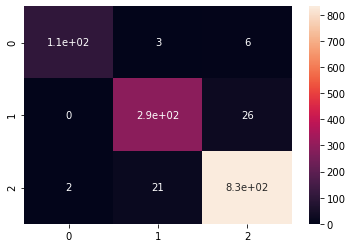

In [43]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_SVM)
#print(cm)
sns.heatmap(cm, annot=True)

In [44]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity:",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity:",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print(NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(FPR)
# False negative rate
FNR = FN/(TP+FN)
print(FNR)
# False discovery rate
FDR = FP/(TP+FP)
print(FDR)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

Sensitivity: [0.92241379 0.91798107 0.97309942]
Specificity: [0.99829352 0.97528321 0.926097  ]
Precision: [0.98165138 0.92380952 0.96296296]
[0.99236641 0.97327852 0.94575472]
[0.00170648 0.02471679 0.073903  ]
[0.07758621 0.08201893 0.02690058]
[0.01834862 0.07619048 0.03703704]
[0.99145963 0.96118012 0.95729814]


The prediction for this image is:  ['NORMAL']
The actual label for this image is:  NORMAL


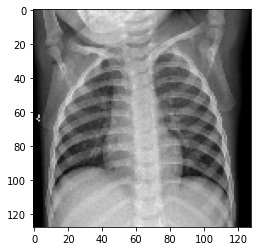

In [45]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=TrainedModel.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_SVM = SVMmodel.predict(input_img_features)[0] 
prediction_SVM = le.inverse_transform([prediction_SVM])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_SVM)
print("The actual label for this image is: ", test_labels[n])

In [46]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

print(RF_model.score(X_for_RF,y_train))

0.9992708333333333


In [47]:
prediction_RF = RF_model.predict(x_test_features)

#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [48]:
# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

#print(RF_model.score(test_labels,prediction_RF))

Accuracy =  0.9503105590062112


<AxesSubplot:>

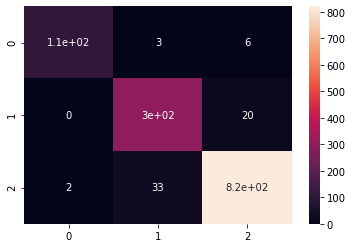

In [49]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['PNEUMONIA']
The actual label for this image is:  PNEUMONIA


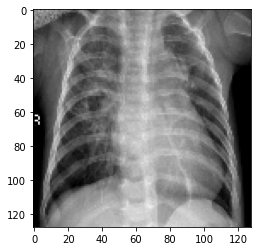

In [50]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=TrainedModel.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

In [51]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity:",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity:",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print(NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(FPR)
# False negative rate
FNR = FN/(TP+FN)
print(FNR)
# False discovery rate
FDR = FP/(TP+FP)
print(FDR)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

Sensitivity: [0.92241379 0.93690852 0.95906433]
Specificity: [0.99829352 0.96292482 0.93995381]
Precision: [0.98165138 0.89189189 0.96926714]
[0.99236641 0.97905759 0.92081448]
[0.00170648 0.03707518 0.06004619]
[0.07758621 0.06309148 0.04093567]
[0.01834862 0.10810811 0.03073286]
[0.99145963 0.95652174 0.95263975]
